In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
## read data

data=pd.read_csv('showwcase_sessions.csv',skip_blank_lines=True)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

In [121]:
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [122]:
### data cleaning and initial exploration 

In [123]:
data[data['session_likes_given'].isnull()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
data.tail()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
data=data.drop([300,301],axis=0)

In [126]:
data.tail()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
295,944212.0,40572.0,10/1/19,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332.0,87323.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0


In [127]:
data['session_likes_given']=data['session_likes_given'].fillna(0.00)

In [128]:
data.iloc[35:36,:]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,0.0,2.0,1120.0,0.0,95.0


In [129]:
data['session_id']=data['session_id'].astype(int).astype(str)
data['customer_id']=data['customer_id'].astype(int).astype(str)

In [130]:
data['login_date']=pd.to_datetime(data['login_date'])

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              300 non-null    object        
 1   customer_id             300 non-null    object        
 2   login_date              300 non-null    datetime64[ns]
 3   projects_added          300 non-null    object        
 4   likes_given             300 non-null    object        
 5   comment_given           300 non-null    object        
 6   inactive_status         300 non-null    object        
 7   bug_occured             300 non-null    object        
 8   session_projects_added  300 non-null    float64       
 9   session_likes_given     300 non-null    float64       
 10  session_comments_given  300 non-null    float64       
 11  inactive_duration       300 non-null    float64       
 12  bugs_in_session         300 non-null    float64   

In [132]:
data['week_number']=data['login_date'].dt.week

In [133]:
data['day_of_week']=data['login_date'].dt.day_name()

In [134]:
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,week_number,day_of_week
0,624205,80746,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,44,Wednesday
1,624241,24520,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,44,Wednesday
2,111002,32047,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,44,Wednesday
3,545113,23404,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,44,Wednesday
4,750269,40235,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,44,Wednesday


In [135]:
data['week_number'].unique()

array([44, 43, 42, 41, 40])

In [136]:
### 4 users didn't do anything in one session

data.loc[(data['projects_added']==False) & (data['likes_given']==False) & (data['comment_given']==False)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,week_number,day_of_week
70,162379,43549,2019-10-24,False,False,False,False,True,0.0,0.0,0.0,0.0,1.0,724.0,43,Thursday
104,243101,29375,2019-10-20,False,False,False,True,True,0.0,0.0,0.0,1109.0,4.0,1115.0,42,Sunday
139,607530,73245,2019-10-17,False,False,False,True,False,0.0,0.0,0.0,1906.0,0.0,690.0,42,Thursday
195,823096,23083,2019-10-11,False,False,False,True,True,0.0,0.0,0.0,1429.0,2.0,665.0,41,Friday


In [137]:
data[data['customer_id']=='43549']

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,week_number,day_of_week
19,590435,43549,2019-10-28,True,True,True,False,True,1.0,5.0,1.0,0.0,3.0,878.0,44,Monday
70,162379,43549,2019-10-24,False,False,False,False,True,0.0,0.0,0.0,0.0,1.0,724.0,43,Thursday
115,930216,43549,2019-10-19,True,False,True,True,False,2.0,0.0,5.0,1673.0,0.0,615.0,42,Saturday
134,730001,43549,2019-10-18,False,False,True,False,False,0.0,0.0,2.0,0.0,0.0,1482.0,42,Friday
206,495864,43549,2019-10-10,True,True,True,True,True,5.0,6.0,5.0,534.0,1.0,312.0,41,Thursday
224,403473,43549,2019-10-08,True,True,True,False,False,2.0,14.0,4.0,0.0,0.0,329.0,41,Tuesday
246,225470,43549,2019-10-06,False,True,True,True,True,0.0,27.0,3.0,254.0,2.0,1998.0,40,Sunday


In [138]:
data['customer_id'].nunique()

48

In [139]:
### Session frequency analysis: the mean time of a user visists showcase platform between two consecutive visits

In [140]:
data=data.sort_values(by=['customer_id','login_date'])
data['session_interval']=data.groupby('customer_id')['login_date'].diff().dt.days

In [141]:
data.groupby('customer_id')['session_interval'].mean().sort_values(ascending=False)

customer_id
80746    9.666667
24520    8.000000
10246    5.000000
98653    4.600000
12407    4.000000
43057    4.000000
96254    3.833333
43549    3.666667
29356    3.600000
12496    3.600000
73524    3.142857
32047    3.000000
34574    3.000000
39475    3.000000
23083    2.800000
51243    2.545455
43086    2.500000
12940    2.500000
93464    2.333333
23985    2.285714
23579    2.250000
40572    1.933333
73245    1.928571
14354    1.928571
87265    1.909091
87323    1.750000
40235    1.687500
38459    1.647059
29375    1.380952
23404    1.350000
19348         NaN
19374         NaN
20548         NaN
23457         NaN
23548         NaN
23596         NaN
29345         NaN
33496         NaN
43096         NaN
43658         NaN
46329         NaN
68754         NaN
76530         NaN
82963         NaN
92736         NaN
93486         NaN
98346         NaN
98476         NaN
Name: session_interval, dtype: float64

count    30.000000
mean      3.161303
std       1.823696
min       1.350000
25%       1.929762
50%       2.672727
75%       3.650000
max       9.666667
Name: session_interval, dtype: float64


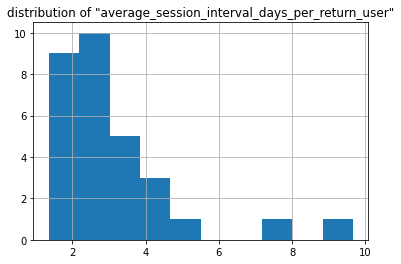

In [142]:
print(data.groupby('customer_id')['session_interval'].mean().describe())
data.groupby('customer_id')['session_interval'].mean().hist()
plt.title('distribution of "average_session_interval_days_per_return_user"')
plt.show()

In [143]:
### session length analysis

count      48.000000
mean     1138.846103
std       439.098765
min       103.000000
25%       973.333333
50%      1167.233333
75%      1332.250000
max      2091.000000
Name: session_duration, dtype: float64


Text(0.5, 1.0, 'distribution of "average_session_duration_per_user_per_session"')

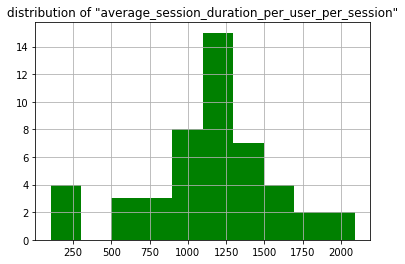

In [144]:
print(data.groupby('customer_id')['session_duration'].mean().describe())
data.groupby('customer_id')['session_duration'].mean().hist(color='green')
plt.title('distribution of "average_session_duration_per_user_per_session"')

In [145]:
## total engagement activities analysis

In [146]:
data['total_activity']=data['projects_added']+data['session_likes_given']+data['session_comments_given']
data['total_activity']=data['total_activity'].astype(float)

In [147]:
total_act_day=pd.DataFrame(data.groupby('login_date')['total_activity'].sum()/data.groupby('login_date')['customer_id'].nunique())
total_act_day.columns=['total_activity per user per day']
total_act_day.reset_index(inplace=True)

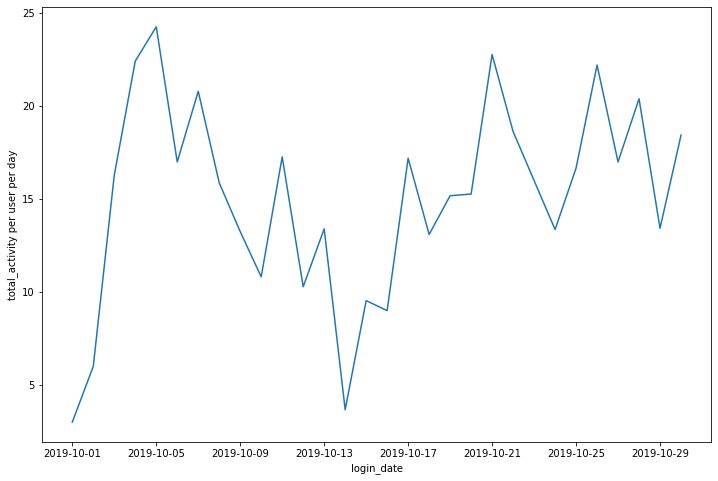

In [148]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.lineplot(x='login_date',y='total_activity per user per day',data=total_act_day,ax=ax1)

In [149]:
total_act_wk_day=pd.DataFrame(data.groupby('day_of_week')['total_activity'].sum()/data.groupby('day_of_week')['customer_id'].nunique())
total_act_wk_day.columns=['total_activity per user per weekday']
total_act_wk_day.reset_index(inplace=True)

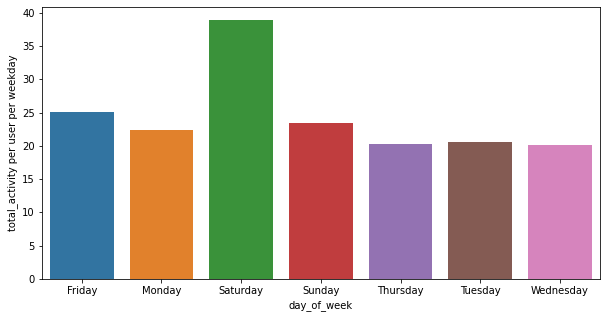

In [150]:
fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(x='day_of_week',y='total_activity per user per weekday',data=total_act_wk_day,ax=ax1)

In [151]:
total_act_week=pd.DataFrame(data.groupby('week_number')['total_activity'].sum()/data.groupby('week_number')['customer_id'].nunique())
total_act_week.columns=['total_activity per user per week']
total_act_week.reset_index(inplace=True)

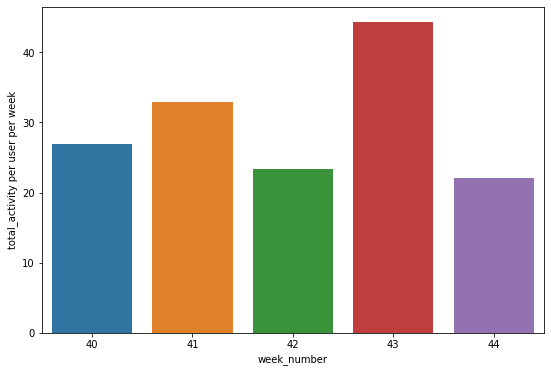

In [152]:
fig, ax1 = plt.subplots(figsize=(9,6))
sns.barplot(x='week_number',y='total_activity per user per week',data=total_act_week,ax=ax1)

In [153]:
### detail engagement activities analysis

In [154]:
## projects_added per user per day
projects_day=pd.DataFrame(data.groupby('login_date')['session_projects_added'].sum()/data.groupby('login_date')['customer_id'].nunique())
projects_day.columns=['projects_added per user per day']
projects_day.reset_index(inplace=True)

In [155]:
## likes_given per user per day
likes_day=pd.DataFrame(data.groupby('login_date')['session_likes_given'].sum()/data.groupby('login_date')['customer_id'].nunique())
likes_day.columns=['likes_given per user per day']
likes_day.reset_index(inplace=True)

In [156]:
## comments_given per user per day
comments_day=pd.DataFrame(data.groupby('login_date')['session_comments_given'].sum()/data.groupby('login_date')['customer_id'].nunique())
comments_day.columns=['comments_given per user per day']
comments_day.reset_index(inplace=True)

In [157]:
df_day = pd.merge(projects_day, likes_day,on='login_date')
df_day = pd.merge(df_day,comments_day,on='login_date')

In [158]:
df_day2=df_day.melt('login_date', var_name='a', value_name='activity per user per day')

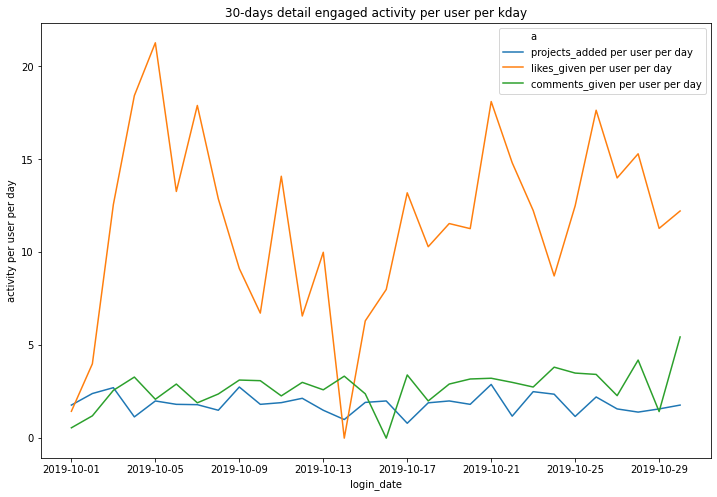

In [159]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.lineplot(x='login_date', y='activity per user per day', data=df_day2, hue='a',ax=ax1)
plt.title('30-days detail engaged activity per user per kday')
plt.show()

In [160]:
## projects_added per user per week
projects_week=pd.DataFrame(data.groupby('week_number')['session_projects_added'].sum()/data.groupby('week_number')['customer_id'].nunique())
projects_week.columns=['projects_added per user per week']
projects_week.reset_index(inplace=True)

In [161]:
## likes_given per user per week
likes_week=pd.DataFrame(data.groupby('week_number')['session_likes_given'].sum()/data.groupby('week_number')['customer_id'].nunique())
likes_week.columns=['likes_given per user per week']
likes_week.reset_index(inplace=True)

In [162]:
## commetns_given per user per week
comments_week=pd.DataFrame(data.groupby('week_number')['session_comments_given'].sum()/data.groupby('week_number')['customer_id'].nunique())
comments_week.columns=['comments_given per user per week']
comments_week.reset_index(inplace=True)

In [163]:
df_week = pd.merge(projects_week, likes_week,on='week_number')
df_week = pd.merge(df_week,comments_week,on='week_number')

In [164]:
df_week2=df_week.melt('week_number', var_name='a', value_name='activity per user per week')

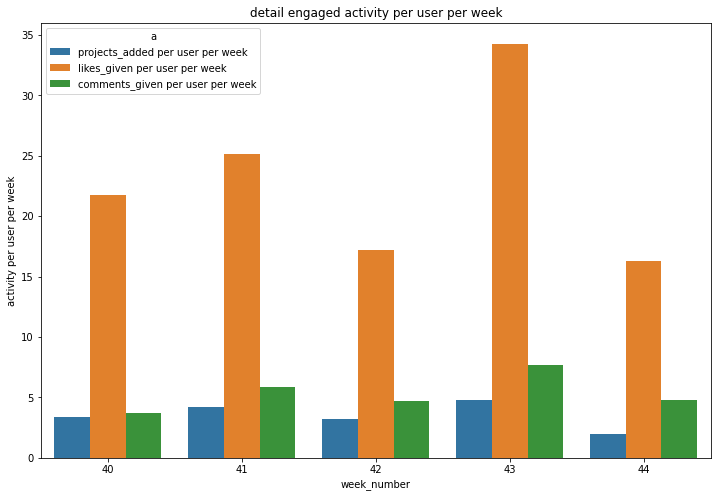

In [165]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(x='week_number', y='activity per user per week', data=df_week2, hue='a',ax=ax1)
plt.title('detail engaged activity per user per week')
plt.show()

In [166]:
## projects_added per user per weekday
projects_wk_day=pd.DataFrame(data.groupby('day_of_week')['session_projects_added'].sum()/data.groupby('day_of_week')['customer_id'].nunique())
projects_wk_day.columns=['projects_added per user per weekday']
projects_wk_day.reset_index(inplace=True)

In [167]:
## likes_given per user per weekday
likes_wk_day=pd.DataFrame(data.groupby('day_of_week')['session_likes_given'].sum()/data.groupby('day_of_week')['customer_id'].nunique())
likes_wk_day.columns=['likes_given per user per weekday']
likes_wk_day.reset_index(inplace=True)

In [168]:
## comments_given per user per weekday
comments_wk_day=pd.DataFrame(data.groupby('day_of_week')['session_comments_given'].sum()/data.groupby('day_of_week')['customer_id'].nunique())
comments_wk_day.columns=['comments_given per user per weekday']
comments_wk_day.reset_index(inplace=True)

In [169]:
df = pd.merge(projects_wk_day, likes_wk_day,on='day_of_week')
df = pd.merge(df,comments_wk_day,on='day_of_week')

In [170]:
df2 = df.melt('day_of_week', var_name='a', value_name='activity per user per weekday')

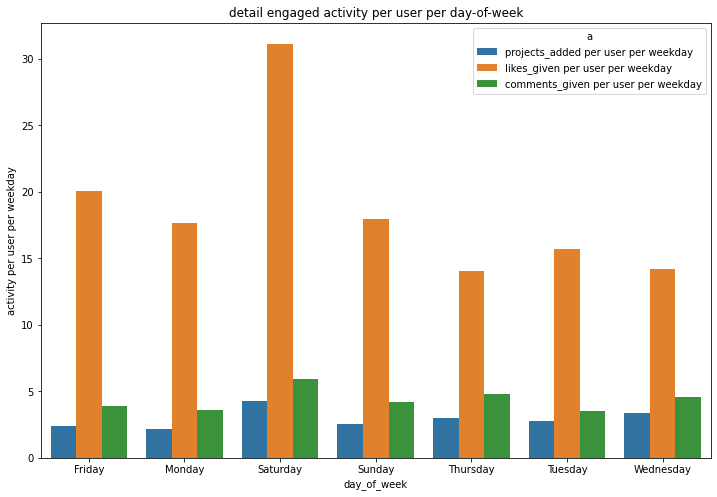

In [171]:
fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(x='day_of_week', y='activity per user per weekday', data=df2, hue='a',ax=ax1)
plt.title('detail engaged activity per user per day-of-week')
plt.show()

In [172]:
## engaged user analysis

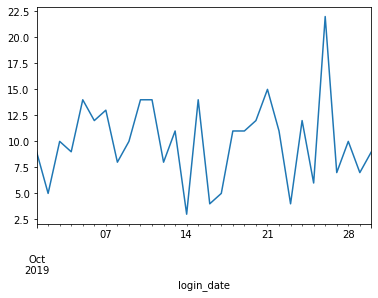

In [173]:
data.groupby('login_date')['customer_id'].count().plot.line()

In [174]:
user_week=data.groupby('week_number')['customer_id'].nunique().to_frame()
user_week.columns=['distinct_user_cnt']
user_week.reset_index(inplace=True)

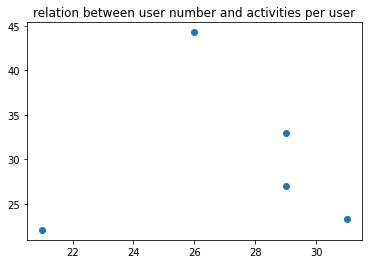

In [175]:
plt.scatter(x=user_week['distinct_user_cnt'],y=total_act_week['total_activity per user per week'])
plt.title('relation between user number and activities per user')
plt.show()

In [176]:
user_week

,week_number,distinct_user_cnt
0,40,29
1,41,29
2,42,31
3,43,26
4,44,21


In [177]:
total_act_week

,week_number,total_activity per user per week
0,40,26.965517
1,41,32.965517
2,42,23.322581
3,43,44.269231
4,44,22.095238
